In [3]:
#importar las librerias necesarias, cryptocmd consulta la api de coinmarketcap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cryptocmd import CmcScraper

In [5]:
#lee la base de datos desde sql
import MySQLdb
mysql_cn= MySQLdb.connect(host='localhost',
                              port=3306,user='root',passwd='T3mpora!',
                              db='Cryptos')
df_prices = pd.read_sql('select * from cryptos;', con=mysql_cn)
print 'loaded dataframe from MySQL. records:', len(df_prices)
mysql_cn.close()

loaded dataframe from MySQL. records: 365


In [7]:
df_prices.tail()

,timeDate,BTC,ETH,XRP,EOS,LTC,XLM,ADA,MIOTA,TRX,...,NAS,HT,IOST,DGD,GXS,KCS,LRC,BNT,SALT,MCO
360,2018-06-21,6729.74,527.37,0.534775,10.42,96.93,0.227997,0.158556,1.160000,0.048620,...,5.38,4.94,0.030697,113.44,2.94,2.76,0.361737,3.48,1.380000,5.04
361,2018-06-22,6083.69,465.82,0.486947,8.66,85.08,0.203407,0.139839,0.979912,0.043136,...,4.66,4.31,0.024219,100.63,2.85,2.40,0.306343,3.08,1.110000,4.88
362,2018-06-23,6162.48,474.52,0.491284,8.41,82.60,0.203515,0.137868,1.040000,0.044179,...,4.56,4.17,0.024005,103.41,2.73,2.42,0.318571,3.12,1.100000,4.83
363,2018-06-24,6173.23,457.67,0.477380,8.09,80.78,0.193633,0.132703,0.978262,0.042460,...,4.47,3.82,0.023196,90.04,2.53,2.22,0.313534,2.98,0.970023,4.76
364,2018-06-25,6249.18,460.31,0.481753,8.24,81.83,0.197753,0.135269,1.020000,0.042349,...,4.53,3.97,0.022964,98.13,2.51,2.24,0.338197,3.03,1.050000,5.05


In [8]:
#read database from csv
#cryptos = pd.read_csv('./cryptos.csv', sep=',')
#set datetime 
df_prices['timeDate'] =  pd.to_datetime(df_prices['timeDate'])
#set index column
df_prices.set_index('timeDate', inplace = True)
df_prices.head(2)

,BTC,ETH,XRP,EOS,LTC,XLM,ADA,MIOTA,TRX,NEO,...,NAS,HT,IOST,DGD,GXS,KCS,LRC,BNT,SALT,MCO
timeDate,,,,,,,,,,,,,,,,,,,,,
2017-06-26,2478.45,272.69,0.277288,NaN,41.13,0.030218,NaN,0.402438,NaN,5.53,...,NaN,NaN,NaN,84.47,4.94,NaN,NaN,2.48,NaN,NaN
2017-06-27,2552.45,293.09,0.276306,NaN,40.54,0.029113,NaN,0.392269,NaN,6.83,...,NaN,NaN,NaN,86.73,5.04,NaN,NaN,3.05,NaN,NaN


In [9]:
#explore the dataset
df_prices.describe()

,BTC,ETH,XRP,EOS,LTC,XLM,ADA,MIOTA,TRX,NEO,...,NAS,HT,IOST,DGD,GXS,KCS,LRC,BNT,SALT,MCO
count,365.000000,365.000000,365.000000,360.000000,365.000000,365.000000,268.000000,365.000000,286.000000,365.000000,...,215.000000,143.000000,161.000000,365.000000,365.000000,245.000000,300.000000,365.000000,270.000000,358.000000
mean,7766.589945,533.756000,0.614104,6.389544,120.371644,0.201353,0.267141,1.469090,0.040179,56.023890,...,6.793070,2.779580,0.040021,161.769479,3.437909,3.803166,0.456582,3.562082,4.676222,8.331957
std,3841.201944,270.495785,0.548008,5.201985,72.578399,0.187030,0.225495,1.130308,0.035431,38.726187,...,2.749542,1.294809,0.016710,106.195958,1.517939,3.606871,0.333919,1.678583,3.190041,4.381551
min,1929.820000,157.360000,0.148056,0.493225,38.920000,0.010600,0.018539,0.158688,0.001427,5.030000,...,1.540000,1.200000,0.016655,44.270000,0.930694,0.429029,0.035719,1.560000,0.970023,0.694733
25%,4382.660000,300.470000,0.211016,1.417500,55.040000,0.022195,0.125962,0.543328,0.002806,28.660000,...,5.175000,1.690000,0.027833,75.240000,2.390000,0.960645,0.178249,2.260000,2.712500,5.747500
50%,7531.980000,471.330000,0.500688,5.910000,113.160000,0.203407,0.213328,1.180000,0.041033,45.540000,...,6.320000,2.290000,0.037563,120.170000,3.040000,3.070000,0.380395,2.980000,3.630000,7.505000
75%,9654.800000,708.870000,0.825857,10.242500,163.350000,0.333916,0.365377,1.920000,0.058667,75.620000,...,8.360000,3.860000,0.046836,230.570000,4.160000,4.420000,0.641973,4.610000,5.180000,10.902500
max,19497.400000,1396.420000,3.380000,21.540000,358.340000,0.896227,1.110000,5.370000,0.220555,187.410000,...,16.240000,5.960000,0.126760,555.440000,10.020000,20.440000,2.120000,10.100000,16.360000,22.890000


In [10]:
#explore returns
df_prices.select_dtypes(include=['number']).pct_change().describe()

,BTC,ETH,XRP,EOS,LTC,XLM,ADA,MIOTA,TRX,NEO,...,NAS,HT,IOST,DGD,GXS,KCS,LRC,BNT,SALT,MCO
count,364.000000,364.000000,364.000000,359.000000,364.000000,364.000000,267.000000,364.000000,285.000000,364.000000,...,214.000000,142.000000,160.000000,364.000000,364.000000,244.000000,299.000000,364.000000,269.000000,357.000000
mean,0.004018,0.003442,0.005415,0.013066,0.004659,0.010884,0.014264,0.007467,0.022895,0.009612,...,0.008514,0.010311,0.011521,0.004506,0.004226,0.011861,0.011953,0.002908,-0.000371,0.012647
std,0.054727,0.063570,0.094914,0.138082,0.076578,0.113598,0.145934,0.101469,0.176412,0.102249,...,0.128893,0.081083,0.212322,0.093481,0.114741,0.131925,0.126649,0.068958,0.099799,0.167412
min,-0.187411,-0.228068,-0.297619,-0.319579,-0.326422,-0.279880,-0.250752,-0.314115,-0.317619,-0.280013,...,-0.656192,-0.162544,-0.270703,-0.368820,-0.385455,-0.244628,-0.575698,-0.211604,-0.223404,-0.313164
25%,-0.025393,-0.027096,-0.036003,-0.046479,-0.036518,-0.045184,-0.049072,-0.051301,-0.056150,-0.051365,...,-0.063437,-0.033010,-0.066699,-0.043514,-0.048440,-0.056369,-0.059635,-0.033939,-0.067568,-0.057546
50%,0.003596,0.000564,-0.004835,-0.005263,-0.000409,-0.003639,-0.009708,-0.004399,-0.004447,-0.005829,...,-0.004424,0.000000,-0.008892,0.001924,-0.006578,-0.001541,0.000860,0.000742,-0.007752,-0.008299
75%,0.032322,0.034335,0.026513,0.051139,0.032987,0.056259,0.043851,0.058020,0.066120,0.048000,...,0.052005,0.050193,0.058643,0.043278,0.041727,0.055587,0.076294,0.038480,0.067367,0.056100
max,0.252472,0.264569,0.834708,1.683168,0.476004,0.947952,1.366810,0.468085,1.196066,0.663448,...,0.618812,0.394904,2.341241,0.785168,0.648276,0.962264,0.568245,0.288714,0.371542,1.674825


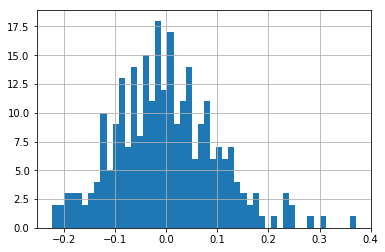

In [11]:
# Plot the distribution of daily returns

df_prices['SALT'].pct_change().hist(bins=50)
plt.show()

In [12]:
#generate Simple Moving Average matrices for trading strategy
SMA9 = df_prices.rolling(9).mean()
SMA21 = df_prices.rolling(21).mean()

In [13]:
#Difference in SMA, when the shortest SMA is above the other one, its considered a buy signal
DSMA = SMA9 - SMA21

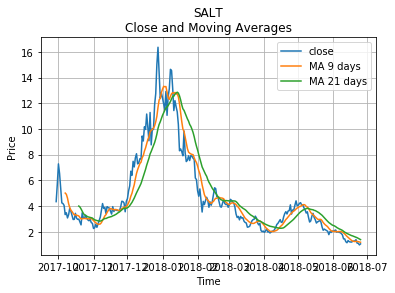

In [14]:
#plot the moving averages and the close price
plt.title('SALT prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.plot(df_prices.index, df_prices.SALT, label= 'close')
plt.plot(df_prices.index, SMA9.SALT, label= 'MA 9 days')
plt.plot(df_prices.index, SMA21.SALT, label= 'MA 21 days')
plt.legend(loc='best')
plt.title('SALT\nClose and Moving Averages')
plt.show()

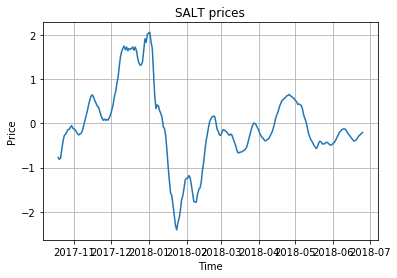

In [15]:
#now we plot the differente in SMA. We buy when it is positive and sell when in becomes negative
plt.title('SALT prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.plot(df_prices.index, DSMA.SALT)
plt.show()

In [16]:
DSMA_bool = DSMA.apply(lambda x : x>0)
DSMA_cv = 2*DSMA_bool-1
DSMA_signal = (DSMA_cv.diff())/2

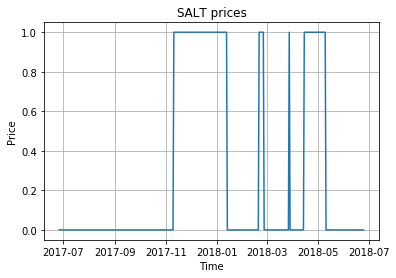

In [17]:
#As above, we hold while it is 1 and sell when it is zero
plt.title('SALT prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.plot(df_prices.index, DSMA_bool.SALT)
plt.show()

In [18]:
#returns for the SMA strategy
SMA_returns = DSMA_bool*df_prices.select_dtypes(include=['number']).pct_change()
SMA_returns.tail(2)

,BTC,ETH,XRP,EOS,LTC,XLM,ADA,MIOTA,TRX,NEO,...,NAS,HT,IOST,DGD,GXS,KCS,LRC,BNT,SALT,MCO
timeDate,,,,,,,,,,,,,,,,,,,,,
2018-06-24,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
2018-06-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,...,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
SMA_compound_returns = (SMA_returns+1).cumprod()-1

In [20]:
buy_n_hold_compound_returns = (df_prices.select_dtypes(include=['number']).pct_change()+1).cumprod()-1

In [21]:
SMA_compound_returns.tail(3)

,BTC,ETH,XRP,EOS,LTC,XLM,ADA,MIOTA,TRX,NEO,...,NAS,HT,IOST,DGD,GXS,KCS,LRC,BNT,SALT,MCO
timeDate,,,,,,,,,,,,,,,,,,,,,
2018-06-23,3.372057,4.353674,4.7856,12.323371,5.558829,9.101226,17.168395,18.759193,10.456952,20.440384,...,0.879054,0.989319,0.298402,1.790409,0.896131,25.292664,13.985936,2.515888,2.040449,9.155134
2018-06-24,3.372057,4.353674,4.7856,12.323371,5.558829,9.101226,17.168395,18.759193,10.456952,20.440384,...,0.879054,0.989319,0.298402,1.790409,0.896131,25.292664,13.985936,2.515888,2.040449,9.155134
2018-06-25,3.372057,4.353674,4.7856,12.323371,5.558829,9.101226,17.168395,18.759193,10.456952,20.440384,...,0.879054,0.989319,0.298402,1.790409,0.896131,25.292664,13.985936,2.515888,2.040449,9.155134


In [22]:
buy_n_hold_compound_returns.tail(3)

,BTC,ETH,XRP,EOS,LTC,XLM,ADA,MIOTA,TRX,NEO,...,NAS,HT,IOST,DGD,GXS,KCS,LRC,BNT,SALT,MCO
timeDate,,,,,,,,,,,,,,,,,,,,,
2018-06-23,1.486425,0.740144,0.771746,7.326733,1.008266,5.734893,4.521567,1.584249,21.222837,5.197107,...,0.050691,1.916084,-0.098505,0.224222,-0.447368,2.339101,2.039510,0.258065,-0.746544,0.955466
2018-06-24,1.490762,0.678353,0.721604,7.009901,0.964017,5.407869,4.314710,1.430839,20.358149,4.654611,...,0.029954,1.671329,-0.128887,0.065941,-0.487854,2.063142,1.991451,0.201613,-0.776492,0.927126
2018-06-25,1.521407,0.688034,0.737374,7.158416,0.989545,5.544212,4.417478,1.534552,20.302314,4.734177,...,0.043779,1.776224,-0.137600,0.161714,-0.491903,2.090738,2.226763,0.221774,-0.758065,1.044534


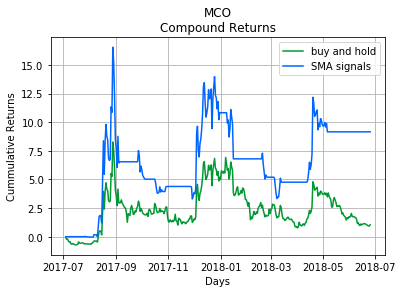

In [31]:
#plot the moving averages and the close price
plt.title('MCO returns')
plt.xlabel('Days')
plt.ylabel('Cummulative Returns')
plt.grid(True)
plt.plot(df_prices.index, buy_n_hold_compound_returns.MCO, label= 'buy and hold', color='#009933')
plt.plot(df_prices.index, SMA_compound_returns.MCO, label= 'SMA signals',color='#0066ff')
plt.legend(loc='best')
plt.title('MCO\nCompound Returns')
plt.show()

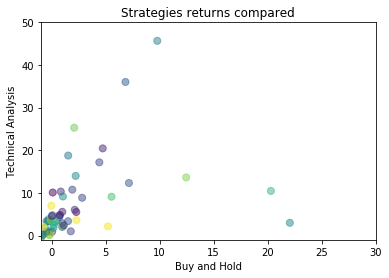

In [27]:
plt.show()
plt.title('Strategies returns compared')
plt.xlabel('Buy and Hold')
plt.ylabel('Technical Analysis')
N=59
x = buy_n_hold_compound_returns.iloc[364]
y = SMA_compound_returns.iloc[364]
colors = np.random.rand(N)
area = 50  # 0 to 15 point radii
plt.xlim(-1, 30)
plt.ylim(-1, 50)

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

In [32]:
d = {'sma': (SMA_compound_returns.iloc[364]), 'buy_n_hold': (buy_n_hold_compound_returns.iloc[364])}
both = pd.DataFrame(data=d)
both['performance']=both.sma/both.buy_n_hold
both
#both.describe()

,buy_n_hold,sma,performance
count,59.000000,59.000000,59.000000
mean,4.415864,6.773145,2.871786
std,18.492887,8.727025,47.244175
min,-0.972150,-0.425429,-274.207728
25%,-0.266159,1.793307,-0.931623
50%,0.737374,3.447707,2.039616
75%,2.184946,9.128180,6.219818
max,139.927553,45.663957,193.632337


In [28]:
SMA_index = DSMA_bool.sum(axis=1)/59
SMA_index = SMA_index.to_frame()
SMA_index.columns = ['prct_index']
SMA_index.describe()

,prct_index
count,365.000000
mean,0.370560
std,0.315036
min,0.000000
25%,0.084746
50%,0.271186
75%,0.661017
max,1.000000


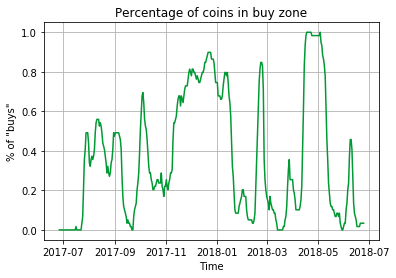

In [29]:
#As above, we hold while it is 1 and sell when it is zero
plt.title('Percentage of coins in buy zone')
plt.xlabel('Time')
plt.ylabel('% of "buys"')
plt.grid(True)
plt.plot(SMA_index.index, SMA_index.prct_index, color='#009933')
plt.show()